In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 10000
training_epochs = 200
nb_classes = 4
drop_rate = 0.3

In [2]:
xy = np.loadtxt('MIMO_2_10dB_NoC_4.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 1:13]
y_data = xy[:, -4:]

print(x_data.shape, y_data.shape)
print(x_data[0])

(40000, 12) (40000, 4)
[ 0.06907259 -0.7754382  -0.02926022 -2.0638485  -1.1988358  -0.18695061
  0.43897945 -1.745061   -0.7208335   1.1568292  -0.9176092   1.4018345 ]


In [3]:
# Convert y_data to y_bit
i=1
y_merge = []
while i <= y_data.shape[0]:
    temp = "".join(str(_) for _ in y_data[i-1,:])
    y_merge.append(temp)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_merge)
y_bit = encoder.transform(y_merge)
y_bit = y_bit.reshape(-1, 1)
print(y_bit)

[[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]]


In [4]:
# Convert y_data to one_hot
y_one_hot = tf.keras.utils.to_categorical(y_bit, nb_classes)
print("one_hot:", y_one_hot)

one_hot: [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [5]:
tf.model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

In [6]:
tf.model.add(tf.keras.layers.Dense(input_dim=x_data.shape[1], units=384, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=192, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 384)               4992      
_________________________________________________________________
dropout (Dropout)            (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 192)               73920     
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 772       
Total params: 79,684
Trainable params: 79,684
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = tf.model.fit(x_data, y_one_hot, batch_size=batch_size, epochs=training_epochs)

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 1.6716 - accuracy: 0.2676
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 1.5980 - accuracy: 0.3887
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 1.5279 - accuracy: 0.4946
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 1.4536 - accuracy: 0.5653
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 1.3697 - accuracy: 0.6236
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 1.2788 - accuracy: 0.6654
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1835 - accuracy: 0.7001
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0902 - accuracy: 0.7284
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 0.9922 - accuracy: 0.7586
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 0.9029 - accuracy: 0.7878
Epoch 11/200
4/4 [===========

4/4 [==============================] - 0s 5ms/step - loss: 0.2579 - accuracy: 0.9322
Epoch 85/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2592 - accuracy: 0.9303
Epoch 86/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2586 - accuracy: 0.9312
Epoch 87/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2576 - accuracy: 0.9309
Epoch 88/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2573 - accuracy: 0.9315
Epoch 89/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2575 - accuracy: 0.9309
Epoch 90/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2574 - accuracy: 0.9311
Epoch 91/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2572 - accuracy: 0.9313
Epoch 92/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2552 - accuracy: 0.9304
Epoch 93/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2557 - accuracy: 0.9322
Epoch 94/200
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.2335 - accuracy: 0.9346
Epoch 168/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2360 - accuracy: 0.9322
Epoch 169/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2346 - accuracy: 0.9338
Epoch 170/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2339 - accuracy: 0.9332
Epoch 171/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2338 - accuracy: 0.9342
Epoch 172/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2339 - accuracy: 0.9340
Epoch 173/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2358 - accuracy: 0.9319
Epoch 174/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2329 - accuracy: 0.9337
Epoch 175/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2322 - accuracy: 0.9341
Epoch 176/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2340 - accuracy: 0.9331
Epoch 177/200
4/4 [=====

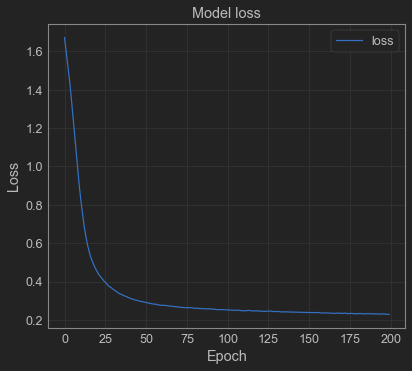

In [8]:
# 모델 손실 함수 시각화
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

plt.plot(history.history['loss'], 'b-', label='loss')
#plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

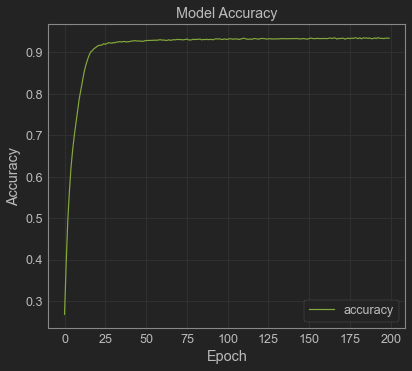

In [9]:
# 모델 정확도 시각화
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
#plt.plot(history.history['val_accuracy'], 'r-', label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Full x_data test
test_data = np.loadtxt('MIMO_2_10dB_NoC_4_test.csv', delimiter=',', dtype=np.float32)
x_test_data = test_data[:, 1:13]
y_test_data = test_data[:, -4:]
print(x_test_data.shape, y_test_data.shape)

(8000, 12) (8000, 4)


In [11]:
# Convert y_test_data to y_test_bit
i=1
y_test_merge = []
while i <= y_test_data.shape[0]:
    temp2 = "".join(str(_) for _ in y_test_data[i-1,:])
    y_test_merge.append(temp2)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_test_merge)
y_test_bit = encoder.transform(y_test_merge)
y_test_bit = y_test_bit.reshape(-1, 1)
print(y_test_bit)

[[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]]


In [12]:
# Convert y_data to one_hot
y_test_one_hot = tf.keras.utils.to_categorical(y_test_bit, nb_classes)
print("one_hot:", y_test_one_hot)

one_hot: [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [13]:
evaluation = tf.model.evaluate(x_test_data, y_test_one_hot)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

250/250 [==============================] - 0s 1ms/step - loss: 0.2150 - accuracy: 0.9400
loss:  0.2150433510541916
accuracy 0.9399999976158142


In [14]:
predict_x = tf.model.predict(x_test_data) 
pred = np.argmax(predict_x,axis=1)
# for p, y in zip(pred, y_test_bit.flatten()):
 #   print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

In [15]:
res_pred = pred.reshape(y_test_data.shape[0], 1)
error_cnt = 0
error = 0
for i in range(0, y_test_data.shape[0]):
    if res_pred[i] != y_test_bit[i]:
        #print("False : {}".format(i))
        #print("[{}] data : {}".format(i, y_test_data[i]))
        error += 1
        for n in range(0, y_test_data.shape[0], int(y_test_data.shape[0]/nb_classes)):
            if y_test_bit[n] == res_pred[i]:
                #print("[{}] pred data: {}".format(n, y_test_data[n]))
                bit_error = 0
                for m in range(0, y_test_data.shape[1]): 
                    if y_test_data[i, m] != y_test_data[n, m]:
                        bit_error += 1
                        error_cnt += 1
                #print("bit error count : ", bit_error)
                break
print("Error : {}".format(error))
print("Error Count: {}".format(error_cnt))

Error : 480
Error Count: 505


In [16]:
BER = (error_cnt)/(y_test_data.shape[0]*2*2)
print("BER: {}".format(BER))

BER: 0.01578125
